<a href="https://colab.research.google.com/github/keleffew/decentralized-diffusion/blob/main/Img2Img_Stable_Diffusion_on_Decentralized_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!nvidia-smi

Fri Aug 26 20:45:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!pip install -qq -U diffusers transformers ftfy
!pip install -qq "ipywidgets>=7,<8"
!pip install --no-cache-dir uplink-python
!pip install boto3


     |████████████████████████████████| 127 kB 28.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [13]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py

--2022-08-26 20:46:58--  https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6808 (6.6K) [text/plain]
Saving to: ‘image_to_image.py’

image_to_image.py   100%[===================>]   6.65K  --.-KB/s    in 0s      

2022-08-26 20:46:58 (82.9 MB/s) - ‘image_to_image.py’ saved [6808/6808]



In [14]:
from torch import autocast
import torch
import requests
from PIL import Image
from io import BytesIO

from image_to_image import StableDiffusionImg2ImgPipeline, preprocess


In [15]:
# load the pipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [102]:
# grab an initial image from decentralized cloud (storj dcs linkshare)
url = "https://link.storjshare.io/raw/juv367flwcwk5ff7qorouy5h3s7a/machine-learning-test%2FBearDrawing.jpeg"

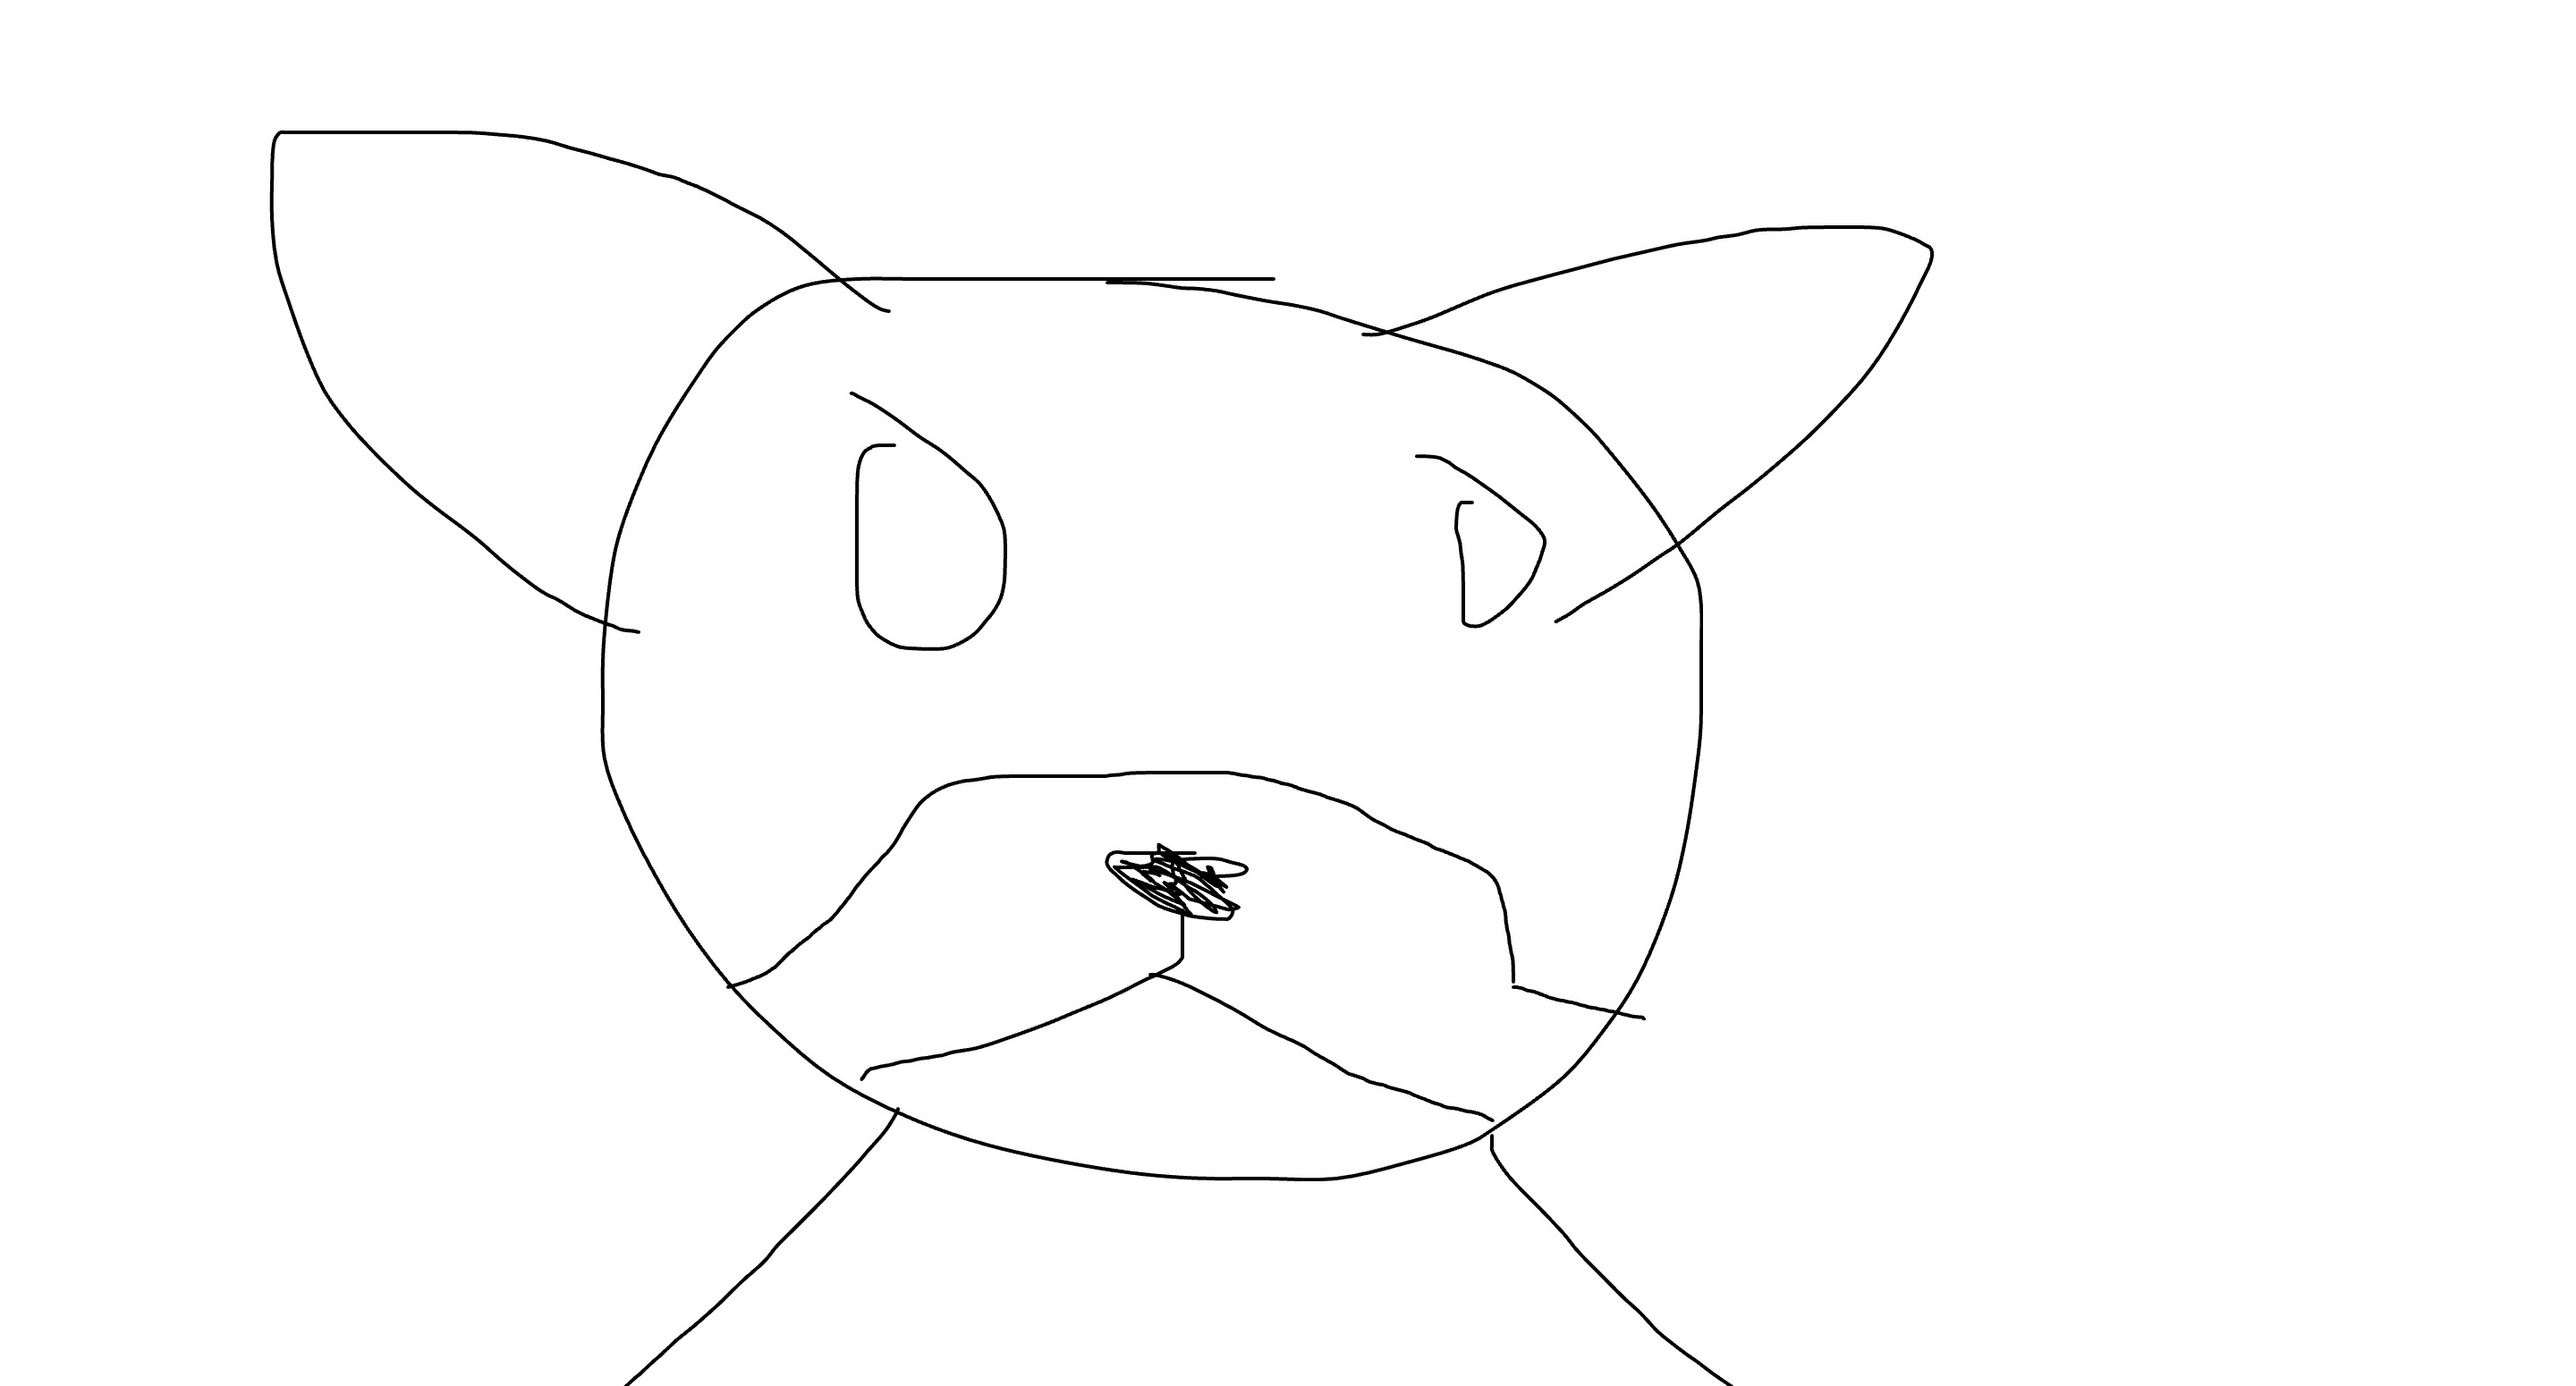

In [103]:
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image

In [104]:
init_image = init_image.resize((768, 512))
init_image = preprocess(init_image)

In [110]:
prompt = "Fuzzy happy animal bear 3d unreal engine 5"

In [111]:
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, strength=0.9, guidance_scale=7.5)["sample"]


0it [00:00, ?it/s]

In [112]:
images[0].save("man-on-europa.png")

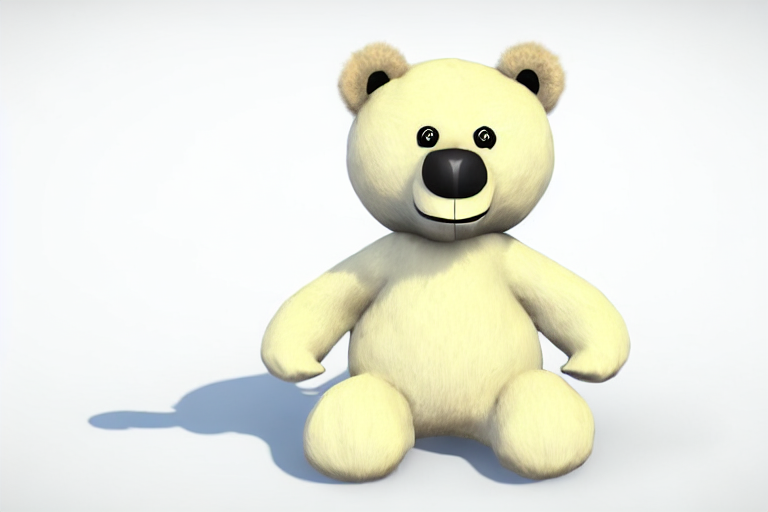

In [113]:
images[0]

In [26]:
#TODO Export img to decentralized cloud

# Python Kit for S3, upload to Storj
import boto3

# Pull S3 credentials from Storj.io, for config docs see: https://docs.storj.io/dcs/api-reference/s3-compatible-gateway/
s3 = boto3.resource('s3',
endpoint_url = 'https://gateway.storjshare.io',
aws_access_key_id = 'ACCESS',
aws_secret_access_key = 'SECRET')

# Upload a new file
data = open('brittish-gosling.png', 'rb')
s3.Bucket('machine-learning-test').put_object(Key='test.jpg', Body=data)

s3.Object(bucket_name='machine-learning-test', key='test.jpg')